# Introducción a regresión lineal 
En esta notebook aprenderemos qué es una regresión lineal y cómo funciona con un ejemplo en Python. Para esto lo primero que tendremos que hacer es descargar los datos y entender qué contienen.

## Librerias

In [1]:
import pandas as pd #https://pandas.pydata.org/
import seaborn as sns #https://seaborn.pydata.org/index.html
import matplotlib.pyplot as plt #https://matplotlib.org/
import numpy as np #https://numpy.org/
import sklearn #https://scikit-learn.org/stable/#
from sklearn.preprocessing import  StandardScaler
from sklearnex.linear_model import  LinearRegression

## Estilo de graficos

In [2]:
sns.set(style="whitegrid", context="notebook")

## Importando datos

In [3]:
df=pd.read_csv("/home/dparedes/platzi/machine-learning/regresión/data/housing.csv", header=None, sep="\s+")
df.columns=["CRIM","ZN","INDUS" , "CHAS" ,"NOX","RM" ,"AGE","DIS", "RAD","TAX", "PTRATIO", "B" , "LSTAT" , "MEDV"]
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Entendiendo los datos
Una vez descargados los datos lo que hay que hacer es entenderlos. Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por lo que yo recomiendo que empecemos viendo un gráfico de correlaciones usando pairplot de Seaborn.

/home/dparedes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dparedes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dparedes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dparedes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

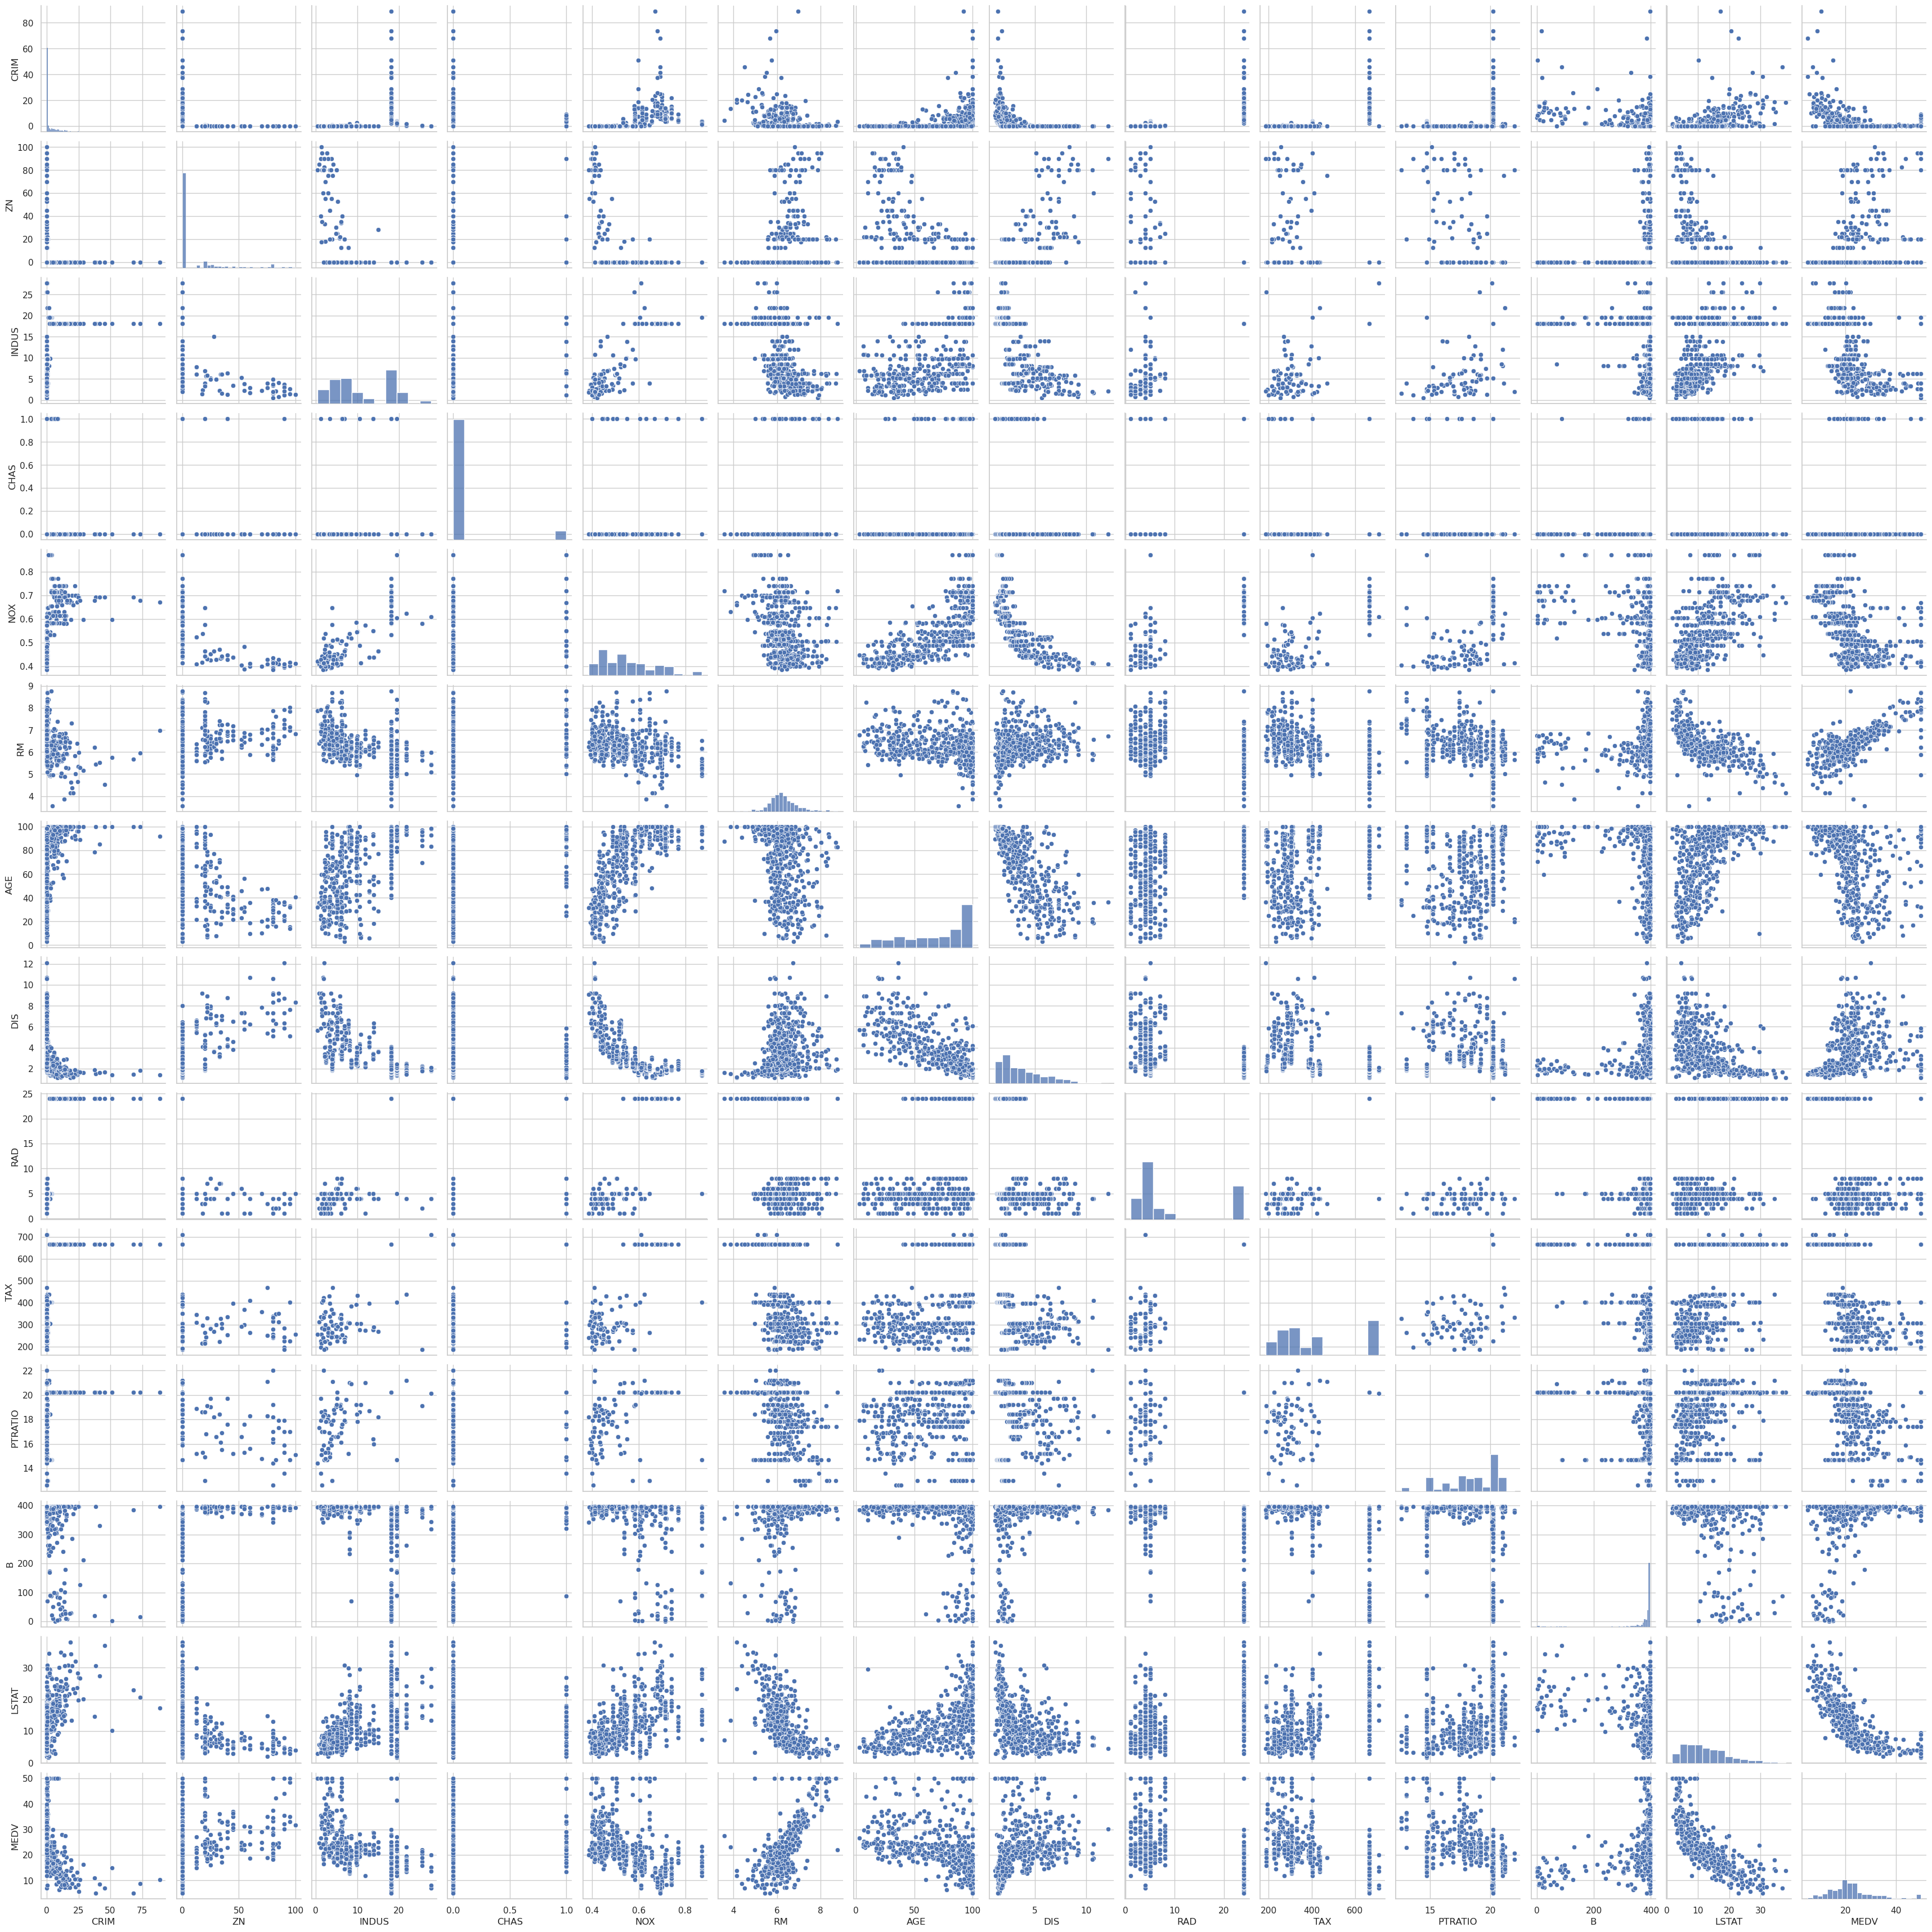

In [4]:
sns.pairplot(df,height=2.5) #Crea grafico de correlación de todas las variables
plt.show()

/home/dparedes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dparedes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dparedes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dparedes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

/home/dparedes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dparedes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dparedes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dparedes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

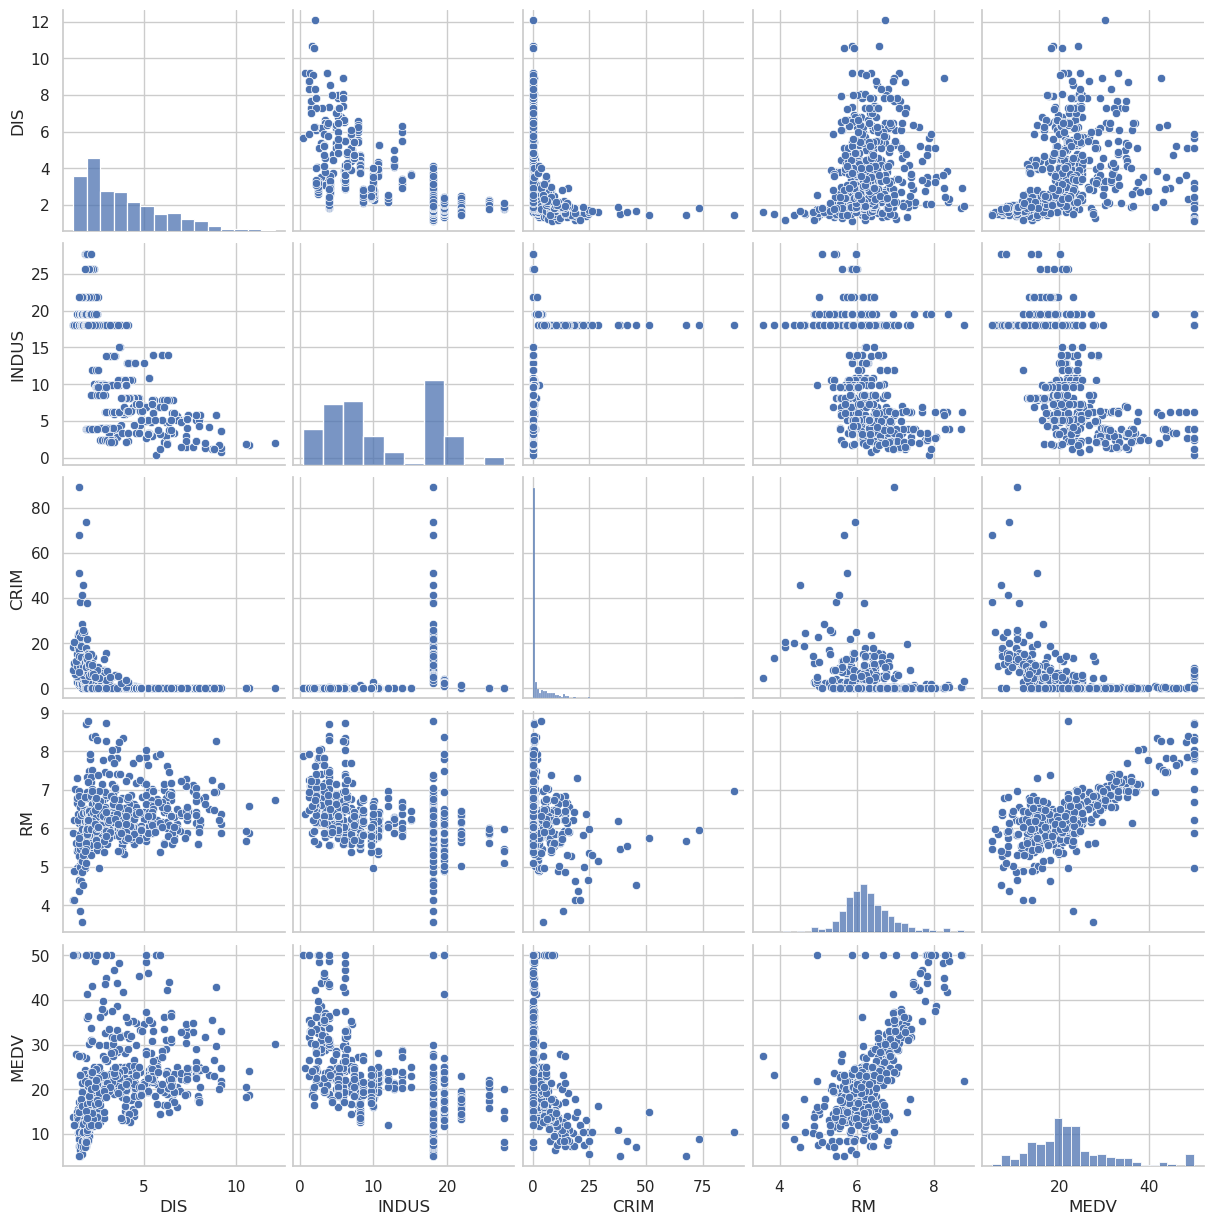

In [5]:
cols = ["DIS", "INDUS", "CRIM", "RM", "MEDV"] #Al no poder distingir las columnas, se realiza un analisis y se escogen las mas representativas
sns.pairplot(df[cols],height=2.5) #Crea grafico de correlación de todas las variables
plt.show()

Una vez que se ve cómo están correlacionadas las variables de manera visual es importante usar un método numérico para poder entender las correlaciones. 

<Axes: >

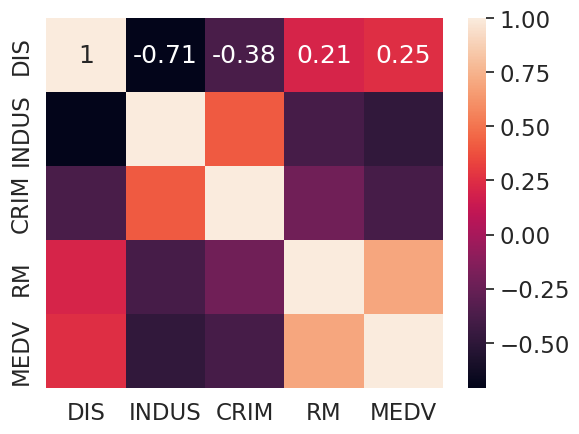

In [6]:
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm,cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

In [7]:
cm = np.corrcoef(df[cols].values.T)
print(cm)

[[ 1.         -0.70802699 -0.37967009  0.20524621  0.24992873]
 [-0.70802699  1.          0.40658341 -0.39167585 -0.48372516]
 [-0.37967009  0.40658341  1.         -0.2192467  -0.38830461]
 [ 0.20524621 -0.39167585 -0.2192467   1.          0.69535995]
 [ 0.24992873 -0.48372516 -0.38830461  0.69535995  1.        ]]


## Creando modelo con scikit-learn

In [10]:
#Escoger las variables X y Y
x = df[["RM","INDUS"]].values
y = df["MEDV"].values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

#Estandariacion de variables 
x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y)

#Stadar lineal regretion
slr = LinearRegression()
slr.fit(x_std, y_std)

LinearRegression()

## Análisis de resultados

#Al utilizar mas de una varibales no podmeos utyilizar u grafico 2D si no uno 3D

/home/dparedes/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


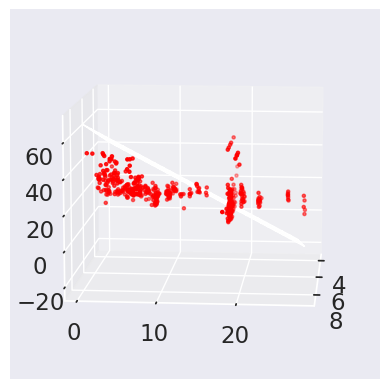

In [19]:
from mpl_toolkits.mplot3d import *

x1_range = np. arange(df["RM"].min(), df["RM"].max())
x2_range = np. arange(df["INDUS"].min(), df["INDUS"].max())

X1, X2 = np.meshgrid(x1_range, x2_range)

plano = pd.DataFrame({"RM":X1.ravel(), "INDUS":X2.ravel()})
pred = slr.predict(plano).reshape(X1.shape)
pred = sc_y.inverse_transform(pred)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X1, X2, pred, alpha=0.4)

ax.scatter3D(df["RM"], df["INDUS"], df["MEDV"], color="red", marker=".")
ax.view_init(elev=10, azim=5)
plt.show()

## Generando predicción con el modelo

In [ ]:
num_rooms = 5
num_rooms_std = sc_x.transform(np.array([num_rooms]).reshape(-1, 1))
predicción =slr.predict(num_rooms_std)
print(predicción)

[[-1.2726238]]


In [ ]:
print(predicción)
print(type(predicción))
value = predicción.item()
print(value)
print(type(value))

[[-1.2726238]]
<class 'numpy.ndarray'>
-1.2726238029877928
<class 'float'>


In [ ]:
#El valor anteriori es el estandarizado, debemos tranformarlo
vlr_transform = sc_y.inverse_transform(predicción)
print(vlr_transform)

[[10.83992413]]


In [ ]:
print(vlr_transform)
print(type(vlr_transform))
value = round(vlr_transform.item(),2)
print(value)
print(type(value))

[[10.83992413]]
<class 'numpy.ndarray'>
10.84
<class 'float'>


In [ ]:
print("El precio de una casa con 5 habitaciones en boston es  de $", value*1000,"dolares" )

El precio de una casa con 5 habitaciones en boston es de $ 10840.0 dolares
